In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

C:\Users\2003j\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df=df.rename(columns={'Raintoday':'Rainyesterday','Raintomorrow':'Raintoday'})

In [9]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,100.0,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,100.0,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,85.0,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,99.0,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No


In [10]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Date']

64191   2009-01-01
64192   2009-01-02
64193   2009-01-03
64194   2009-01-04
64195   2009-01-05
           ...    
80992   2017-06-20
80994   2017-06-22
80995   2017-06-23
80996   2017-06-24
80997   2017-06-25
Name: Date, Length: 7557, dtype: datetime64[ns]

In [13]:
df['Season']=df['Date'].apply(date_to_season)

In [14]:
df['Season'].value_counts()

Season
Autumn    1947
Winter    1918
Spring    1911
Summer    1781
Name: count, dtype: int64

In [15]:
df=df.drop(columns='Date')

In [16]:
x=df.drop(columns='RainTomorrow',axis=1)

In [17]:
y=df['RainTomorrow']

In [18]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,100.0,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,100.0,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,85.0,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,99.0,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,Winter


In [19]:
y

64191    Yes
64192     No
64193     No
64194     No
64195     No
        ... 
80992     No
80994     No
80995    Yes
80996     No
80997     No
Name: RainTomorrow, Length: 7557, dtype: object

In [20]:
y.value_counts()


RainTomorrow
No     5766
Yes    1791
Name: count, dtype: int64

In [21]:
print(x.value_counts())

Location          MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Season
Melbourne         2.3      15.2     0.0       1.0          8.6       NNE          31.0           N           N           15.0          15.0          87.0         43.0         1026.1       1022.1       1.0       3.0       3.9      13.9     No         Winter    1
Watsonia          3.6      18.8     0.2       5.6          12.5      WSW          30.0           W           SW          2.0           13.0          81.0         44.0         1019.9       1018.0       6.0       6.0       9.6      17.3     No         Spring    1
                  3.8      12.5     0.2       0.6          4.6       WSW          19.0           WNW         SW          4.0           13.0          100.0        78.0         1029.4       1028.0       8.0       2.0     

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [23]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


In [24]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [25]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features = [col for col in categorical_features if col != 'RainTomorrow']


In [26]:
categorical_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Season']

In [27]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [28]:
numerical_features = list(df.select_dtypes(include=['int64', 'float64']).columns)


In [29]:
categorical_features = [col for col in categorical_features if col != 'RainTomorrow']


In [30]:
categorical_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Season']

In [31]:
numerical_transformer=Pipeline(steps=[('scaler',StandardScaler())])

In [32]:
numerical_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [33]:
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [34]:
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [35]:
preprocessor=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_features),('cat',categorical_transformer,categorical_features)])

In [36]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'Evaporation', 'Sunshine', 'WindGustSpeed',
                                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                  'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                                  'Cloud9am', 'Cloud3pm', 'Temp9am',
                                  'Temp3pm']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm', 'RainToday', 'Season'])])

In [37]:
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(random_state=42))])

In [38]:
param_grid={'classifier__n_estimators':[50,100],'classifier__max_depth':[None,10,20],'classifier__min_samples_split':[2,5]}

In [39]:
cv=StratifiedKFold(n_splits=5,shuffle=True)

In [40]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=2,
    error_score='raise'
)


In [41]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3p...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainToday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [42]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3p...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainToday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [43]:
grid_search.best_params_

{'classifier__max_depth': None,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100}

In [44]:
test_score=grid_search.score(x_test,y_test)

In [45]:
test_score

0.8432539682539683

In [46]:
y_pred=grid_search.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.76      0.50      0.60       358

    accuracy                           0.84      1512
   macro avg       0.81      0.72      0.75      1512
weighted avg       0.83      0.84      0.83      1512



In [48]:
conf_mat=confusion_matrix(y_test,y_pred)

In [49]:
conf_mat

array([[1097,   57],
       [ 180,  178]], dtype=int64)

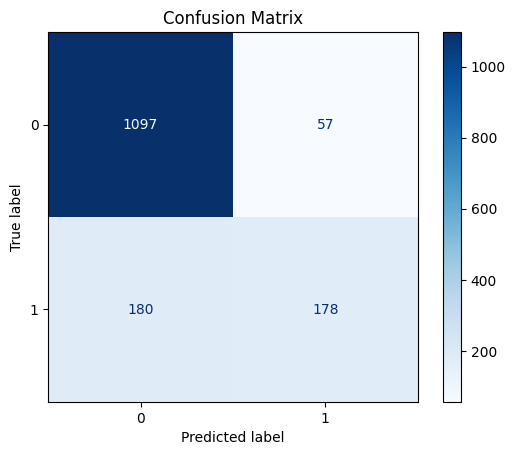

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [51]:
feature_names=numerical_features+list(grid_search.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

In [52]:
feature_names

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Watsonia',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'W

In [53]:
feature_importances=grid_search.best_estimator_['classifier'].feature_importances_

In [54]:
feature_importances

array([0.04080071, 0.04135759, 0.02689962, 0.03516396, 0.08014254,
       0.05067493, 0.03199048, 0.03125207, 0.03727461, 0.12152511,
       0.08434237, 0.08982927, 0.0219838 , 0.03677212, 0.0401893 ,
       0.04670901, 0.00578152, 0.00638643, 0.00531889, 0.001031  ,
       0.00105841, 0.00046646, 0.00729296, 0.00107575, 0.00250625,
       0.0041002 , 0.00201437, 0.00313893, 0.00089455, 0.00278044,
       0.00333373, 0.00391868, 0.00401039, 0.00224295, 0.00410432,
       0.00136599, 0.00203277, 0.00055966, 0.00734232, 0.00264885,
       0.00305937, 0.0031106 , 0.00178721, 0.00174597, 0.00077191,
       0.00155159, 0.00176646, 0.00348349, 0.00378827, 0.0023734 ,
       0.00348718, 0.00068026, 0.00149224, 0.00029466, 0.00529803,
       0.00228065, 0.00331458, 0.003669  , 0.00319871, 0.00446919,
       0.00114351, 0.00341493, 0.00404613, 0.00348595, 0.00226209,
       0.00369395, 0.00293394, 0.00663951, 0.00597186, 0.00597267,
       0.00624141, 0.00494477, 0.00531321])

In [55]:
importance_df=pd.DataFrame({'Feature':feature_names,'Importance':feature_importances}).sort_values(by='Importance',ascending=False)

In [56]:
importance_df

,Feature,Importance
9,Humidity3pm,0.121525
11,Pressure3pm,0.089829
10,Pressure9am,0.084342
4,Sunshine,0.080143
5,WindGustSpeed,0.050675
...,...,...
44,WindDir9am_SE,0.000772
51,WindDir3pm_E,0.000680
37,WindDir9am_ESE,0.000560
21,WindGustDir_ESE,0.000466


In [57]:
n=20
top_features=importance_df.head(20)
top_features

,Feature,Importance
9,Humidity3pm,0.121525
11,Pressure3pm,0.089829
10,Pressure9am,0.084342
4,Sunshine,0.080143
5,WindGustSpeed,0.050675
15,Temp3pm,0.046709
1,MaxTemp,0.041358
0,MinTemp,0.040801
14,Temp9am,0.040189
8,Humidity9am,0.037275


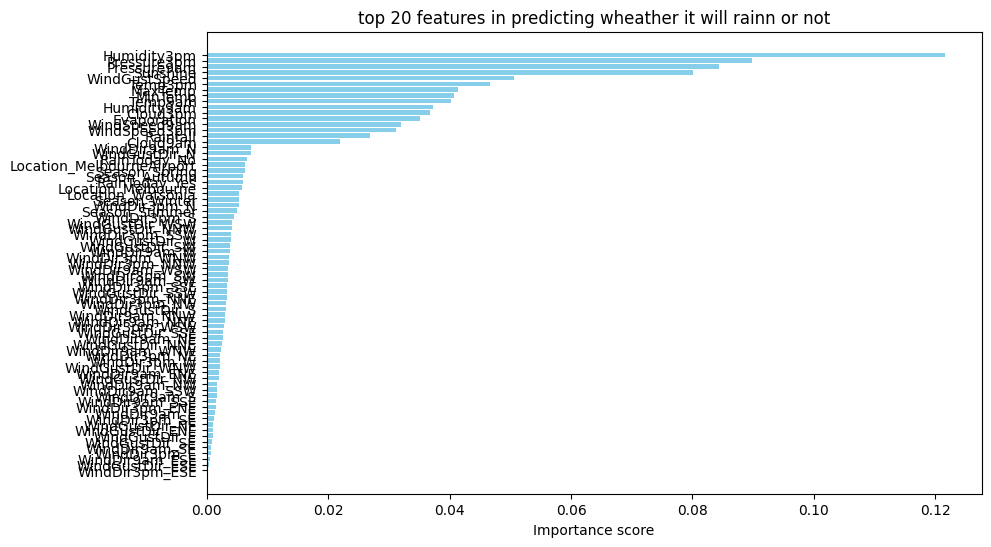

In [58]:
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'],importance_df['Importance'],color='skyblue')
plt.gca().invert_yaxis()
plt.title('top 20 features in predicting wheather it will rainn or not')
plt.xlabel('Importance score')
plt.show()

In [59]:
pipeline.set_params(classifier=LogisticRegression(random_state=42))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday', 'Season'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [60]:
grid_search.estimator=pipeline

In [61]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3p...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainToday',
                                                                          'Season'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [62]:
param_grid={'classifier__solver':['liblinear'],'classifier__penalty':['l1','l2'],'classifier__class_weight':[None,'balanced']}

In [63]:
param_grid

{'classifier__solver': ['liblinear'],
 'classifier__penalty': ['l1', 'l2'],
 'classifier__class_weight': [None, 'balanced']}

In [64]:
grid_search.param_grid=param_grid

In [65]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3p...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainToday',
                                                                          'Season'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [66]:
grid_search.score(x_test,y_test)

0.828042328042328

In [67]:
y_pred=grid_search.predict(x_test)

In [68]:
y_pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [69]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n          No       0.86      0.93      0.89      1154\n         Yes       0.68      0.51      0.58       358\n\n    accuracy                           0.83      1512\n   macro avg       0.77      0.72      0.74      1512\nweighted avg       0.82      0.83      0.82      1512\n'

In [70]:
conf_matr=confusion_matrix(y_pred,y_test)

In [71]:
conf_matr

array([[1070,  176],
       [  84,  182]], dtype=int64)

In [72]:
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='d')
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

NameError: name 'conf_matrix' is not defined

<Figure size 640x480 with 0 Axes>